# 02wk-2: 회귀분석 (3) – Step1,2,4 의 변형

최규빈  
2024-03-13

<a href="https://colab.research.google.com/github/guebin/DL2024/blob/main/posts/02wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-xrw8e2pQ1KqKFb-i3lVtsI&si=dDAjAteouM7Y30HU>

# 2. Imports

In [5]:
import torch
import matplotlib.pyplot as plt 
import numpy as np

# 3. 회귀분석 예제의 다양한 구현

## A. Data

In [6]:
temp = [-2.4821, -2.3621, -1.9973, -1.6239, -1.4792, -1.4635, -1.4509, -1.4435,
        -1.3722, -1.3079, -1.1904, -1.1092, -1.1054, -1.0875, -0.9469, -0.9319,
        -0.8643, -0.7858, -0.7549, -0.7421, -0.6948, -0.6103, -0.5830, -0.5621,
        -0.5506, -0.5058, -0.4806, -0.4738, -0.4710, -0.4676, -0.3874, -0.3719,
        -0.3688, -0.3159, -0.2775, -0.2772, -0.2734, -0.2721, -0.2668, -0.2155,
        -0.2000, -0.1816, -0.1708, -0.1565, -0.1448, -0.1361, -0.1057, -0.0603,
        -0.0559, -0.0214,  0.0655,  0.0684,  0.1195,  0.1420,  0.1521,  0.1568,
         0.2646,  0.2656,  0.3157,  0.3220,  0.3461,  0.3984,  0.4190,  0.5443,
         0.5579,  0.5913,  0.6148,  0.6469,  0.6469,  0.6523,  0.6674,  0.7059,
         0.7141,  0.7822,  0.8154,  0.8668,  0.9291,  0.9804,  0.9853,  0.9941,
         1.0376,  1.0393,  1.0697,  1.1024,  1.1126,  1.1532,  1.2289,  1.3403,
         1.3494,  1.4279,  1.4994,  1.5031,  1.5437,  1.6789,  2.0832,  2.2444,
         2.3935,  2.6056,  2.6057,  2.6632]
sales= [-8.5420, -6.5767, -5.9496, -4.4794, -4.2516, -3.1326, -4.0239, -4.1862,
        -3.3403, -2.2027, -2.0262, -2.5619, -1.3353, -2.0466, -0.4664, -1.3513,
        -1.6472, -0.1089, -0.3071, -0.6299, -0.0438,  0.4163,  0.4166, -0.0943,
         0.2662,  0.4591,  0.8905,  0.8998,  0.6314,  1.3845,  0.8085,  1.2594,
         1.1211,  1.9232,  1.0619,  1.3552,  2.1161,  1.1437,  1.6245,  1.7639,
         1.6022,  1.7465,  0.9830,  1.7824,  2.1116,  2.8621,  2.1165,  1.5226,
         2.5572,  2.8361,  3.3956,  2.0679,  2.8140,  3.4852,  3.6059,  2.5966,
         2.8854,  3.9173,  3.6527,  4.1029,  4.3125,  3.4026,  3.2180,  4.5686,
         4.3772,  4.3075,  4.4895,  4.4827,  5.3170,  5.4987,  5.4632,  6.0328,
         5.2842,  5.0539,  5.4538,  6.0337,  5.7250,  5.7587,  6.2020,  6.5992,
         6.4621,  6.5140,  6.6846,  7.3497,  8.0909,  7.0794,  6.8667,  7.4229,
         7.2544,  7.1967,  9.5006,  9.0339,  7.4887,  9.0759, 11.0946, 10.3260,
        12.2665, 13.0983, 12.5468, 13.8340]
x = torch.tensor(temp).reshape(-1,1)
ones = torch.ones(100).reshape(-1,1)
X = torch.concat([ones,x],axis=1)
y = torch.tensor(sales).reshape(-1,1)

## B. 파이토치를 이용한 학습

`-` 외우세여

In [19]:
What = torch.tensor([[-5.0],[10.0]],requires_grad = True)
for epoc in range(30):
    # step1: yhat 
    yhat = X@What 
    # step2: loss
    loss = torch.sum((y-yhat)**2)
    # step3: 미분
    loss.backward()
    # step4: update
    What.data = What.data - 0.001 * What.grad
    What.grad = None

`-` 결과 시각화

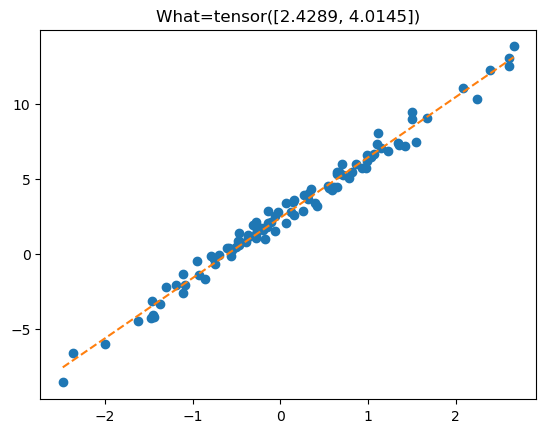

In [42]:
plt.plot(x,y,'o')
plt.plot(x,X@What.data,'--')
plt.title(f'What={What.data.reshape(-1)}');

## C. Step2의 수정

`-` 수정된 코드

In [110]:
What = torch.tensor([[-5.0],[10.0]],requires_grad = True)
loss_fn = torch.nn.MSELoss()
for epoc in range(30):
    # step1: yhat 
    yhat = X@What 
    # step2: loss
    #loss = torch.sum((y-yhat)**2)/100
    #loss = torch.mean((y-yhat)**2) 
    loss = loss_fn(yhat,y) # 여기서는 큰 상관없지만 습관적으로 yhat을 먼저넣는 연습을 하자!!
    # step3: 미분
    loss.backward()
    # step4: update
    What.data = What.data - 0.1 * What.grad
    What.grad = None

`-` 결과확인

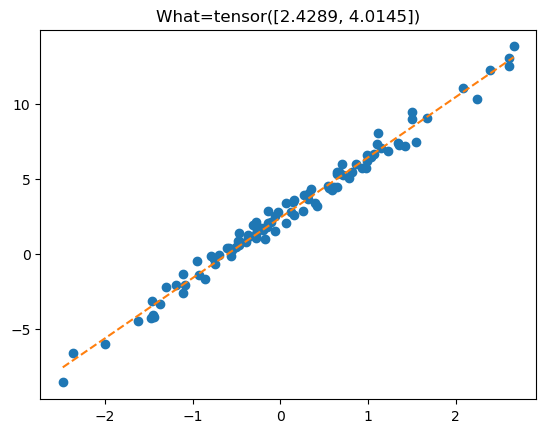

In [111]:
plt.plot(x,y,'o')
plt.plot(x,X@What.data,'--')
plt.title(f'What={What.data.reshape(-1)}');

## D. Step1의 수정 – `net`의 이용

`-` net 오브젝트란?

원래 yhat을 이런식으로 구했는데 ~

In [112]:
What = torch.tensor([[-5.0],[10.0]],requires_grad = True)
(X@What.data)[:5]

이런식으로도 구할수 있음!

In [113]:
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)

In [114]:
net.weight.data = torch.tensor([[-5.0,  10.0]])
net.weight

In [116]:
net(X)[:5]

`-` 학습

In [117]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
for epoc in range(30):
    # step1: yhat 
    yhat = net(X)
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    net.weight.data = net.weight.data - 0.1 * net.weight.grad
    net.weight.grad = None

`-` 결과확인

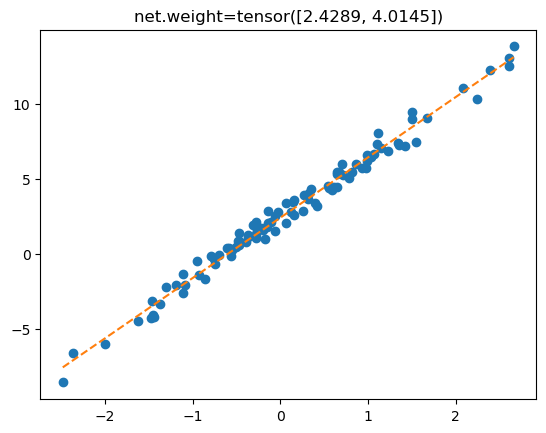

In [118]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')
plt.title(f'net.weight={net.weight.data.reshape(-1)}');

## E. Step4의 수정 – optimizer의 이용

***기존코드의 에폭별분해***

`-` 준비과정

In [145]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()

`-` 에폭별분해

(미분전) – step1~2 완료

In [146]:
yhat = net(X)
loss = loss_fn(yhat,y)

In [147]:
print(f'파라메터 = {net.weight.data}')
print(f'미분값 = {net.weight.grad}')

파라메터 = tensor([[-5., 10.]])
미분값 = None

(미분후, 업데이트 진행전) – step3 완료

In [148]:
loss.backward()

In [149]:
print(f'파라메터 = {net.weight.data}')
print(f'미분값 = {net.weight.grad}')

파라메터 = tensor([[-5., 10.]])
미분값 = tensor([[-13.4225,  11.8892]])

(업데이트 진행후) – step4 의 첫째줄 완료

In [150]:
net.weight.data = net.weight.data - 0.1 * net.weight.grad

In [151]:
print(f'파라메터 = {net.weight.data}')
print(f'미분값 = {net.weight.grad}')

파라메터 = tensor([[-3.6578,  8.8111]])
미분값 = tensor([[-13.4225,  11.8892]])

(업데이트 완료 후 초기화까지 끝냄) – step4 의 두번째줄 완료

In [152]:
net.weight.grad = None

In [153]:
print(f'파라메터 = {net.weight.data}')
print(f'미분값 = {net.weight.grad}')

파라메터 = tensor([[-3.6578,  8.8111]])
미분값 = None

***새로운코드의 에폭별분해***

`-` 준비과정 – 옵티마이저라는 오브젝트를 셋팅한다!

In [165]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step3을 위한 사전준비 
optimizr = torch.optim.SGD(params=net.parameters(),lr=0.1)

`-` 에폭별분해

(미분전) – step1~2 완료

In [167]:
yhat = net(X)
loss = loss_fn(yhat,y)

In [168]:
print(f'파라메터 = {net.weight.data}')
print(f'미분값 = {net.weight.grad}')

파라메터 = tensor([[-5., 10.]])
미분값 = None

(미분후, 업데이트 진행전) – step3 완료

In [169]:
loss.backward()

In [170]:
print(f'파라메터 = {net.weight.data}')
print(f'미분값 = {net.weight.grad}')

파라메터 = tensor([[-5., 10.]])
미분값 = tensor([[-13.4225,  11.8892]])

(업데이트 진행후) – step4 의 첫째줄 완료

In [171]:
#net.weight.data = net.weight.data - 0.1 * net.weight.grad
optimizr.step()

In [172]:
print(f'파라메터 = {net.weight.data}')
print(f'미분값 = {net.weight.grad}')

파라메터 = tensor([[-3.6578,  8.8111]])
미분값 = tensor([[-13.4225,  11.8892]])

(업데이트 완료 후 초기화까지 끝냄) – step4 의 두번째줄 완료

In [173]:
#net.weight.grad = None
optimizr.zero_grad()

In [174]:
print(f'파라메터 = {net.weight.data}')
print(f'미분값 = {net.weight.grad}')

파라메터 = tensor([[-3.6578,  8.8111]])
미분값 = None

***최종코드***

`-` 학습

In [175]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비 
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)
for epoc in range(30):
    # step1: yhat 
    yhat = net(X)
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    optimizr.step()
    optimizr.zero_grad()

`-` 결과확인

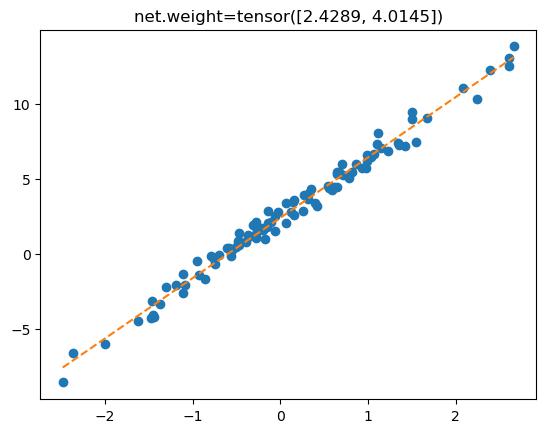

In [177]:
plt.plot(x,y,'o')
plt.plot(x,yhat.data,'--')
plt.title(f'net.weight={net.weight.data.reshape(-1)}');